## Building a Decision Tree from Scratch for Mushroom Classification

This dataset is from the UC Irvine Machine Learning Repository collected from the Audobon Society Field Guide. It observes 22 characteristics of 23 species of gilled mushrooms in the Agaricus and Lepiota family and identifies them as either edible or not safe for consumption. All 22 features are categorical and the target variable has two categories (edible and poisonous). 

Using this dataset I will be writing a Decision Tree algorithm from scratch to build intuition on Decision Trees and to help classify mushrooms of given characteristics.

### Data Preparation

In [215]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [89]:
mushroom = pd.read_csv("Mushrooms.csv")

In [90]:
# look at first few rows
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [91]:
summary = pd.DataFrame({
    "Attribute": mushroom.columns,
    "Unique count": [mushroom[col].nunique() for col in mushroom.columns],
    "Classes": [mushroom[col].unique() for col in mushroom.columns]
})

In [92]:
print(summary)

                   Attribute  Unique count  \
0                      class             2   
1                  cap-shape             6   
2                cap-surface             4   
3                  cap-color            10   
4                    bruises             2   
5                       odor             9   
6            gill-attachment             2   
7               gill-spacing             2   
8                  gill-size             2   
9                 gill-color            12   
10               stalk-shape             2   
11                stalk-root             5   
12  stalk-surface-above-ring             4   
13  stalk-surface-below-ring             4   
14    stalk-color-above-ring             9   
15    stalk-color-below-ring             9   
16                 veil-type             1   
17                veil-color             4   
18               ring-number             3   
19                 ring-type             5   
20         spore-print-color      

In [93]:
# the data doesn't cover all the possible classes, add missing classes as placeholders
mushroom['gill-spacing'] = pd.Categorical(mushroom['gill-spacing'], categories=['c', 'w', 'd'])
mushroom['gill-attachment'] = pd.Categorical(mushroom['gill-attachment'], categories=['a', 'd', 'f', 'n'])
mushroom['veil-type'] = pd.Categorical(mushroom['veil-type'], categories=['p', 'u'])
mushroom['ring-type'] = pd.Categorical(mushroom['ring-type'], categories=['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'])

In [94]:
# separate the class attribute
X = mushroom.drop(columns = ['class'])
y = mushroom['class']

In [95]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [96]:
# label encode class attribute
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [97]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [98]:
# one-hot encode the attributes
df = pd.get_dummies(data = X,
                         prefix = X.columns,
                         columns = X.columns,
                         dtype=int)

In [99]:
df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [100]:
# see how many attributes the dataframe has after one-hot encoding
attributes = [x for x in df.columns]
print(len(attributes))

124


In [101]:
# convert dataframe into array
X = df.values

In [102]:
# look at first row
X[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [103]:
# split data into training/validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [104]:
# split training/validation set into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24)

In [105]:
# look at first few elements of X_train
print("The first few elements of X_train:\n", X_train[:2])

The first few elements of X_train:
 [[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]]


In [106]:
# check type of data
type(X_train)

numpy.ndarray

In [107]:
# look at first few elements of y_train
print("The first few elements of y_train:\n", y_train[:2])

The first few elements of y_train:
 [0 0]


In [108]:
# check type of data
type(y_train)

numpy.ndarray

In [109]:
# check dimensions of variables
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (4874, 124)
The shape of y_train is:  (4874,)
Number of training examples (m): 4874


### Building the Decision Tree Algorithm

The entropy function describes how much impurity is in each node. If all the samples describe the same feature, the entropy is 0. The more even the numbers are from each sub-branch, the more impure it is and the closer to 1 the entropy gets. 

The split dataset function helps split the dataset at each node depending on whether the sample shows the presence or absence of a selected feature.

The information gain function calculates the information gain for any nodal split for a selected feature. You can then compare the information gains calculated for each feature split and choose the feature that provided the most information gain, that is, the split that provided that purest groupings of sub-classes. 

In [110]:
# create function to calculate entropy
## this function takes in the array y and indicates whether the samples are edible or poisonous
## it computes p1 which is the fraction of examples that are edible then uses p1 to calculate the entropy using the log equation
def compute_entropy(y):
    #initialise the variable
    entropy = 0

    if len(y) !=0:
        p1 = len(y[y==1])/len(y) #find how many edible samples are in all the samples
 
        if p1 == 0 or p1 == 1:
            entropy =0
        else:
            entropy = -p1*np.log2(p1)-(1-p1)*np.log2(1-p1)

    return entropy

In [111]:
#create sample y to test compute_entropy
sample_y = np.array([0,0,0,1,1,1])
print("Entropy of sample_y is:", compute_entropy(sample_y)) #should be 1.0 because same amount of edible and poisonous samples

Entropy of sample_y is: 1.0


In [112]:
# create function that will split the data at a node into left and right branches based on the selected feature
def split_dataset(X, node_indices, feature):
    """
    node_indices: indices of samples considered for feature split
    feature: index of feature to split the data on

    """
    #initiate variables
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i,feature] == 1:
            left_indices.append(i)
        elif X[i,feature] == 0:
            right_indices.append(i)

    return left_indices, right_indices

In [152]:
# create function for information gain
def compute_information_gain(X, y, node_indices, feature):
    
    X_node, y_node = X[node_indices], y[node_indices] #extract relevant rows of X and y
    
    # split the dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # create useful variables
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # initiate variable
    information_gain = 0
    
    # handle empty splits
    if len(left_indices) == 0 or len(right_indices) == 0:
        return 0  

    # find w_left of equation
    w_left = len(X_left)/len(X_node) # no of labels out of all labels of the node that went into the left branch
    # find w_right of equation
    w_right = len(X_right)/len(X_node) # no of labels out all labels of the node that went into the right branch
    # find node entropy
    node_entropy = compute_entropy(y_node) # entropy at root node
    # find left entropy
    left_entropy = compute_entropy(y_left) # entropy at left branch using ratio of positive labels 
    # find right entropy
    right_entropy = compute_entropy(y_right) #entropy at right branch using ratio of positive labels
    
    # calculate weighted entropy
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    # calculate information gain
    information_gain = node_entropy - weighted_entropy

    return information_gain

In [189]:
# create function that selects the split that provides the most information gain
def get_best_split(X, y, node_indices):

    #get the number of features that the dataset has
    num_features = X.shape[1]

    #initiate variables
    best_feature = -float('inf')
    max_info_gain = 0

    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    return best_feature if max_info_gain != -float('inf') else None

In [199]:
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    global tree
    # Stop splitting if maximum depth reached or no more splits
    if current_depth == max_depth or len(set(y[node_indices])) == 1:
        # Add leaf node
        leaf_label = max(set(y[node_indices]), key=list(y[node_indices]).count)
        tree.append(leaf_label)
        return len(tree) - 1  # Return the index of the leaf node

    # Get the best feature to split
    best_feature = get_best_split(X, y, node_indices)
    print(f"{'-'*current_depth} Depth {current_depth}, {branch_name}: Split on feature {best_feature}")

    # Split the dataset
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)

    # Create the current node in the tree
    current_node_index = len(tree)
    tree.append(None)  # Placeholder for the current node

    # Recursively build left and right subtrees
    left_child_index = build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth + 1)
    right_child_index = build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth + 1)

    # Update the current node
    tree[current_node_index] = (best_feature, 1, left_child_index, right_child_index)  # Threshold set to 1 for binary splits

    return current_node_index  # Return index of the current node


In [200]:
# define root indices
root_indices = list(range(X_train.shape[0]))

In [201]:
tree=[]
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=5, current_depth=0)

 Depth 0, Root: Split on feature 27
- Depth 1, Left: Split on feature 107
-- Depth 2, Right: Split on feature 66
--- Depth 3, Left: Split on feature 38
--- Depth 3, Right: Split on feature 1
---- Depth 4, Right: Split on feature 7
- Depth 1, Right: Split on feature 20
-- Depth 2, Right: Split on feature 56
--- Depth 3, Right: Split on feature 58
---- Depth 4, Right: Split on feature 35


0

In [ ]:
def predict(tree, sample):
    current_node = tree[0]  # Start at the root node
    while isinstance(current_node, tuple):  # While it's not a leaf node
        feature, threshold, left_child, right_child = current_node
        if sample[feature] <= threshold:
            current_node = tree[left_child]
        else:
            current_node = tree[right_child]
    return current_node  # Return the class label

In [203]:
y_pred = [predict(tree, x) for x in X_val]

In [204]:
print(tree)

[(27, 1, 1, 12), (107, 1, 2, 3), 1, (66, 1, 4, 7), (38, 1, 5, 6), 0, 1, (1, 1, 8, 9), 1, (7, 1, 10, 11), 1, 0, (20, 1, 13, 14), 1, (56, 1, 15, 16), 0, (58, 1, 17, 18), 0, (35, 1, 19, 20), 1, 0]


In [205]:
accuracy = sum(y_pred == y_val) / len(y_val)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.48


In [206]:
y_test_pred = [predict(tree, x) for x in X_test]
test_accuracy = sum(y_test_pred == y_test) / len(y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.47


### Using DecisionTreeClassifier

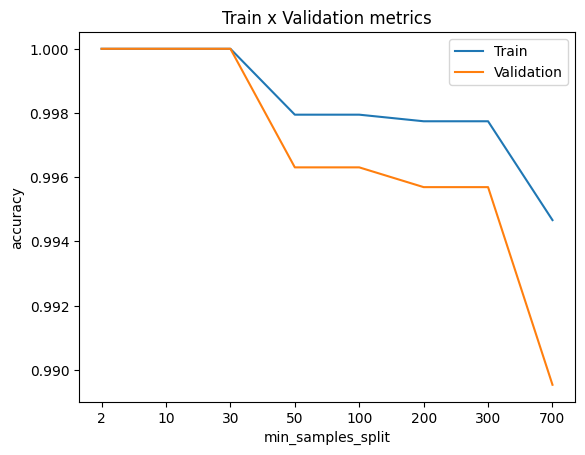

In [217]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 
RANDOM_STATE = 24

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

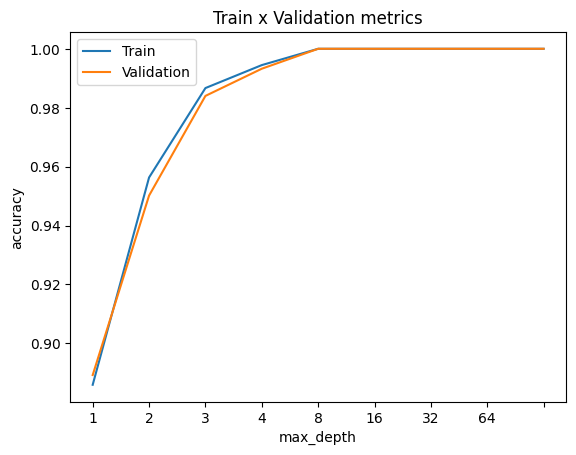

In [218]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [237]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 30,
                                             max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [238]:
# Predict on the test set
y_test_pred = decision_tree_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the result
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.99


In [239]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)

# Print the average accuracy
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.99


In [240]:
# Predict on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.99


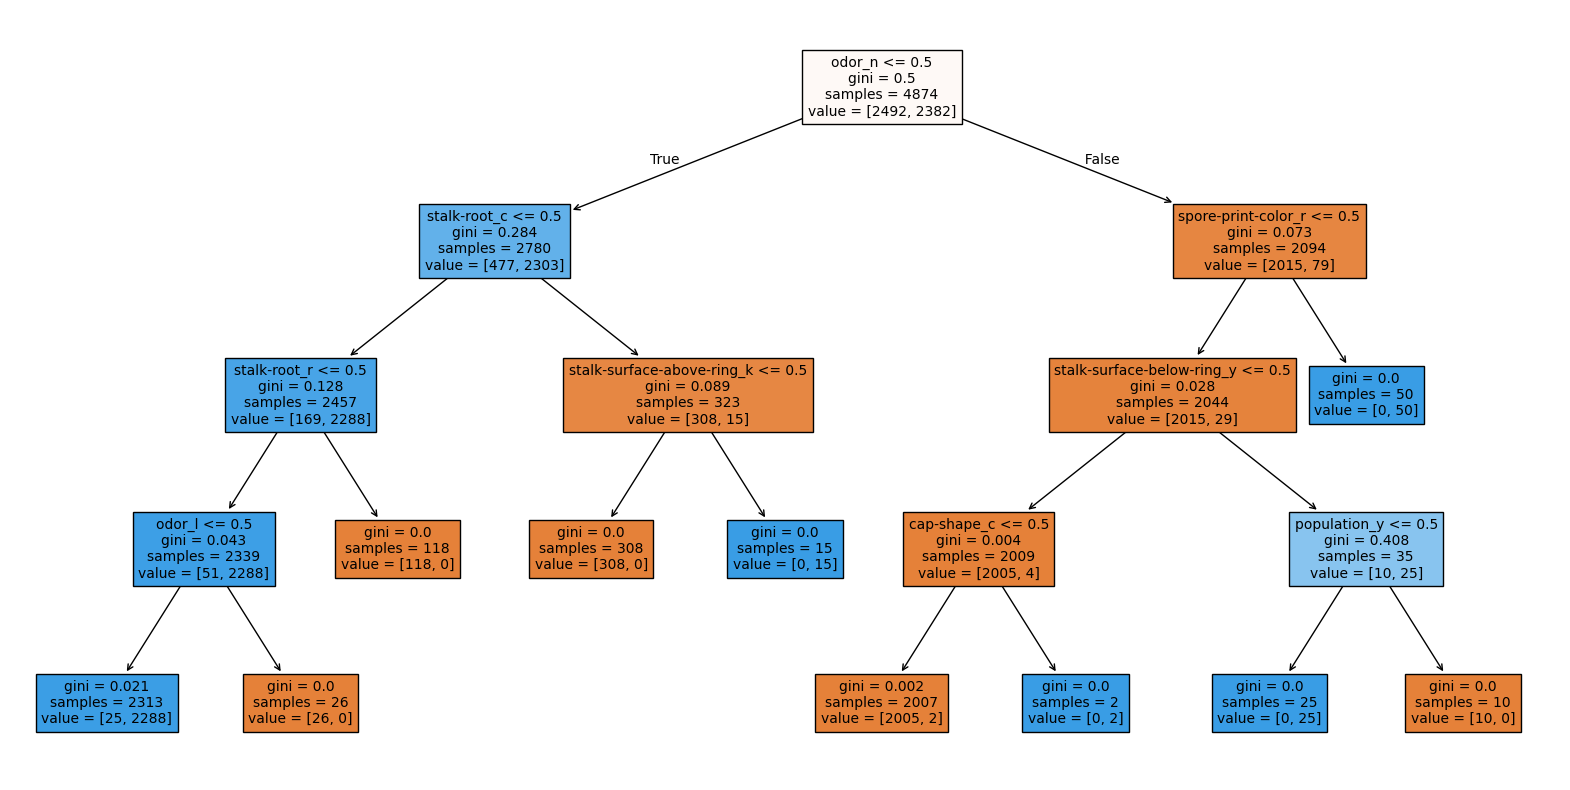

In [242]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, fontsize=10, feature_names=df.columns)
plt.show()
